# 국민청원 데이터 분석하기
* 이 노트북의 경로 : 
# https://goo.gl/Hp8jVa
* 국민청원은 2017년 8월에 처음시작되어 이제 1년 반 정도(현재시점 2019년 2월)가 되었습니다. 
* 해당 내용을 통해 사회적 이슈를 분석하거나 확인해 볼 수도 있지만,
* 이 튜토리얼은 청와대 국민청원 데이터를 통해 텍스트 데이터 분석에 입문하고 간단한 머신러닝을 활용해 보는 것에 목적을 두고 있습니다.
* 만료된 청원을 분석합니다
* 로컬 주피터 노트북에서 실습하고자 하시는 분들은 아래의 소스코드를 활용해 주세요.
* github  :  https://github.com/corazzon/petitionWrangling/blob/master/02-pandas-plotnine.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 출력데이터가 지저분하게 보이지 않도록
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install plotnine==0.5.0
!pip install --upgrade pandas==0.23.4

     |████████████████████████████████| 3.6 MB 7.2 MB/s 
  Attempting uninstall: plotnine
    Found existing installation: plotnine 0.6.0
    Uninstalling plotnine-0.6.0:
      Successfully uninstalled plotnine-0.6.0
     |████████████████████████████████| 8.8 MB 6.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.23.4 which is incompatible.
pymc3 3.11.4 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.23.4 which is incompatible.
fbprophet 0.7.1 req

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np

print(pd.__version__)
print(np.__version__)

0.23.4
1.19.5


여기에서는 시각화 도구로 [plotnine(A grammar of graphics for Python)](https://github.com/has2k1/plotnine)을 사용한다.

In [ ]:
from plotnine import *

# Pandas로 데이터 살펴보기
* 데이터 출처 : https://github.com/akngs/petitions

In [ ]:
# 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 합니다.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
url ='https://drive.google.com/file/d/1B1NI58KCP4IHO9e9xH58R7W9ngnNjIAd/view?usp=sharing'
id = url.split('=')[1]
print(id)

sharing


In [ ]:
%ls #파일보기 명령어

adc.json  petition.csv  sample_data/


In [ ]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('petition.csv')  

In [ ]:
petitions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project/국민청원 분석 깃허브예제/data/402to1385.csv', index_col=0, \
                        parse_dates=['sday', 'eday'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(984, 9)

## 일부 데이터 미리보기
* 전체 데이터를 한꺼번에 읽어오면 스크롤도 길고 내용이 너무 많기 때문에 일부 데이터만을 본다.
* head()는 윗부분의 데이터 5개를 기본값으로 읽어오고 tail()은 마지막 부분의 데이터를 읽어온다.
* 터미널에서 파일을 미리보기 할 때 사용하는 명령어와 같다.

In [ ]:
# head를 통해 상위 몇 개의 데이터만을 본다.
# 기본은 5개를 불러오며, 괄호안에 숫자를 적어주면 숫자만큼 불러온다.
petitions.head(3)

In [ ]:
# 위에서 불러온 head와 반대로 뒤에서부터 데이터를 읽어온다.
# 터미널에서 크롤링을 하며 tail 파일명으로 크롤링 데이터를 읽었던 기억을 떠올려 보자.
petitions.tail(3)

In [ ]:
# 데이터프레임의 컬럼만을 불러올 수 있다.
petitions.columns

In [ ]:
# 데이터셋의 정보를 볼 수 있다.
# 어떤 컬럼이 있고 몇 개의 데이터가 있으며 어떤 타입인지 볼 수 있다.
petitions.info()

In [ ]:
# petitions.describe?

In [ ]:
# 숫자로 된 데이터에 대해 count, mean, std, min, max값 등을 볼 수 있다.
petitions.describe()

## 결측치가 있는지 확인

* N/A인 컬럼을 요약해 보여준다.
* 결측치가 있다면 보정이 필요하다. 하지만 이 데이터는 너무나 깔끔하다! 결측치가 없다.
* 하지만 때론, 결측치가 0이나 다른 숫자로 대체해서 들어가 있을 수도 있음으로 데이터를 좀 더 살펴봐야 한다.

In [ ]:
petitions.isnull().sum()

progress       0
title          4
like           0
contents       0
answer       973
category       4
sday           4
eday           4
proponent      4
dtype: int64

### 답변대상 청원 컬럼 다시 만들기
기존 `answerd`컬럼은 답변 여부가 있었다. 
여기에서는 답변 받은 것과 상관없이 답변 대상 건에 대해 새로운 컬럼을 추가해 주었다.

In [ ]:
petitions['answered'] = (petitions['like'] > 200000) == 1
petitions.shape

(984, 10)

In [ ]:
petitions.head()

progress   ...    answered
article_id            ...            
602915        청원진행중   ...       False
602916        청원진행중   ...       False
602917        청원진행중   ...       False
602918        청원진행중   ...       False
602919        청원진행중   ...       False

[5 rows x 10 columns]

In [ ]:
petitions.tail()

progress   ...    answered
article_id            ...            
602922        청원진행중   ...       False
602923        청원진행중   ...       False
602924        청원진행중   ...       False
582349         답변완료   ...        True
10            error   ...       False

[5 rows x 10 columns]

### 청원기간 컬럼 생성

In [ ]:
petitions['duration'] = petitions['eday'] - petitions['sday']
petitions.sort_values('duration', ascending=True).head(3)

progress   ...    duration
number            ...            
586900     청원종료   ...     30 days
587550     청원종료   ...     30 days
587551     청원종료   ...     30 days

[3 rows x 11 columns]

### 청원기간별 건

30일이 가장 많고 다음으로 90일, 7일 순이다. 

In [ ]:
petitions['duration'].value_counts()

30 days    980
Name: duration, dtype: int64

#### 청원기간이 90일이고 답변 대상 건

In [ ]:
petitions.loc[(petitions['duration'] == '90 days') & (petitions['answered'] == 1)]

Empty DataFrame
Columns: [progress, title, votes, content, answer, category, start, end, proponent, answered, duration]
Index: []

#### 청원기간이 60일이고 답변 대상 건

In [ ]:
petitions_60_answer = petitions.loc[(petitions['duration'] == '60 days') & (petitions['answered'] == 1)]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(0, 11)


Empty DataFrame
Columns: [progress, title, votes, content, answer, category, start, end, proponent, answered, duration]
Index: []

#### 청원기간이 30일이고 답변 대상 건

In [ ]:
petitions_30_answer = petitions.loc[(petitions['duration'] == '30 days') \
                                    & (petitions['answered'] == 1)]
print(petitions_30_answer.shape)
petitions_30_answer.head()

(11, 11)


progress   ...    duration
number            ...            
586926     답변완료   ...     30 days
586941     답변완료   ...     30 days
587130     답변완료   ...     30 days
587169     답변완료   ...     30 days
587323     답변완료   ...     30 days

[5 rows x 11 columns]

#### 청원기간이 7일이고 답변 대상 건
* 청원기간이 7일인데 답변 대상인 건은 없다.
* 청원기간이 7일인 데이터의 시작 날짜를 그룹화 해보면 청원 초기(2017년 8월 19일~9월 14일)에는 답변 대기 기간이 7일 이었던 것으로 추정된다.

In [ ]:
petitions_7_answer = petitions.loc[(petitions['duration'] == '7 days') \
                                   & (petitions['answered'] == 1)]
print(petitions_7_answer.shape)
petitions_7 = petitions.loc[(petitions['duration'] == '7 days')]
print(petitions_7.shape)
petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True)

(0, 11)
(0, 11)


Empty DataFrame
Columns: [start, count]
Index: []

## 어느 분야의 청원이 가장 많이 들어왔는지
* pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있다.
* 이 데이터로는 정치개혁과 관련된 국민청원이 가장 많다는 것을 알 수 있다.

In [ ]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

category  counts
0          보건복지     179
1         육아/교육     139
2            기타     121
3        인권/성평등     114
4         안전/환경      87
5            행정      68
6      외교/통일/국방      63
7          정치개혁      50
8   문화/예술/체육/언론      38
9         경제민주화      32
10          일자리      32
11     교통/건축/국토      31
12         성장동력      12
13           미래       9
14         농산어촌       2
15         반려동물       2
16    저출산/고령화대책       1

## 청원이 얼마 동안 집계되었는지
청원이 가장 많이 들어 온 날은 언제인지 정렬해 본다.

In [ ]:
start_df = pd.DataFrame(petitions['sday'].value_counts()).reset_index()
start_df.columns = ['sday', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 14일


sday  counts
0 2020-03-23     132
1 2020-03-30      84
2 2020-04-06      84
3 2020-03-31      82
4 2020-03-24      78

## 피봇 테이블로 투표를 가장 많이 받은 분야 보기

In [ ]:
# pd.pivot_table?

In [ ]:
petitions_unique = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='like', ascending=False).reset_index()
petitions_best

category  answered     like
0        인권/성평등       4.0  2821259
1            기타       3.0  2169875
2         안전/환경       1.0  1060129
3         육아/교육       0.0   755192
4          보건복지       0.0   593491
5            행정       1.0   537987
6   문화/예술/체육/언론       1.0   442061
7      교통/건축/국토       1.0   410297
8          정치개혁       0.0   359810
9      외교/통일/국방       0.0   187748
10          일자리       0.0    56275
11         반려동물       0.0    42107
12         성장동력       0.0    30560
13        경제민주화       0.0    28457
14           미래       0.0    20663
15         농산어촌       0.0      841
16    저출산/고령화대책       0.0      336

## 투표를 가장 많이 받은 날

In [ ]:
petitions_start = pd.pivot_table(petitions, index=['sday'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='like', ascending=False)
votes_df.loc[petitions_start['like'] > 350000]

answered     like
sday                         
2020-03-23       2.0  1778632
2020-04-02       1.0  1369336
2020-03-27       2.0  1047390
2020-03-24       1.0  1033073
2020-03-29       2.0  1022811
2020-03-25       1.0   742932
2020-04-07       1.0   582619
2020-04-01       1.0   483564
2020-03-26       0.0   462333

## 청원을 많이 받은 날 VS 투표를 많이 받은 날

In [ ]:
# 인덱스로 되어있는 start를 키로 사용하기 위해 
# index로 설정된 start를 컬럼으로 변경해주고 인덱스를 생성한다.
votes_df = votes_df.reset_index()
votes_df.head()

sday  answered     like
0 2020-03-23       2.0  1778632
1 2020-04-02       1.0  1369336
2 2020-03-27       2.0  1047390
3 2020-03-24       1.0  1033073
4 2020-03-29       2.0  1022811

In [ ]:
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('votes', ascending=False)[:5]

start  counts  answered   votes
1 2019-08-28       1      True  365040
0 2021-12-10      10     False   40678

In [ ]:
hottest_day_df.sort_values('counts', ascending=False)[:5]

start  counts  answered   votes
0 2021-12-10      10     False   40678
1 2019-08-28       1      True  365040

## 답변 대상 청원
- 20만건 이상의 투표를 받으면 답변을 받을 수 있는 청원이 된다.

In [ ]:
answered_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 1건


In [ ]:
answered_df.head()

progress                           title   ...     answered duration
article_id                                            ...                      
582349         답변완료  나경원 자한당 원내대표의 각종 의혹에 대한 특검 요청!   ...         True  30 days

[1 rows x 11 columns]

### 답변 대상 청원 중 투표를 가장 많이 받은 것

In [ ]:
answered_df.sort_values('votes', ascending=False).head(10)

progress                           title   ...     answered duration
article_id                                            ...                      
582349         답변완료  나경원 자한당 원내대표의 각종 의혹에 대한 특검 요청!   ...         True  30 days

[1 rows x 11 columns]

## 시각화
## [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* 이미지 출처 : [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

<img src="https://cdn-images-1.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png">

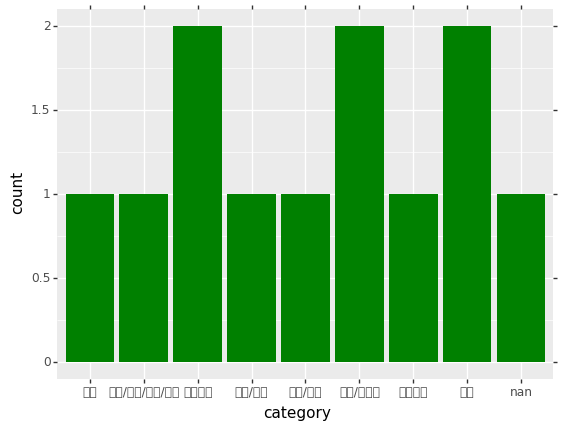

<ggplot: (8765161243953)>

In [ ]:
# 카테고리별로 집계된 데이터를 barplot으로 그려본다.
# 그런데 한글이 깨져보이는 것을 볼 수 있다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
)

## 시각화를 위해 한글폰트 설치

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

#### 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트를 사용해야 한다.
* 여기에서는 나눔바른고딕을 사용하도록 한다. 
    * 이때 폰트가 로컬 컴퓨터에 설치되어 있어야한다. 
    * 나눔고딕은 무료로 사용할 수 있는 폰트다. 
    * 참고 : [네이버 나눔글꼴 라이선스](https://help.naver.com/support/contents/contents.nhn?serviceNo=1074&categoryNo=3497)
* 한글을 사용하기 위해서는 ggplot에서 theme에 폰트를 지정해 주면된다.
* 아래의 문서를 참고하면 **element_text**와 관련된 옵션을 볼 수 있다.
* 참고 : [plotnine.themes.element_text — plotnine 0.3.0 documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

In [ ]:
fm._rebuild()

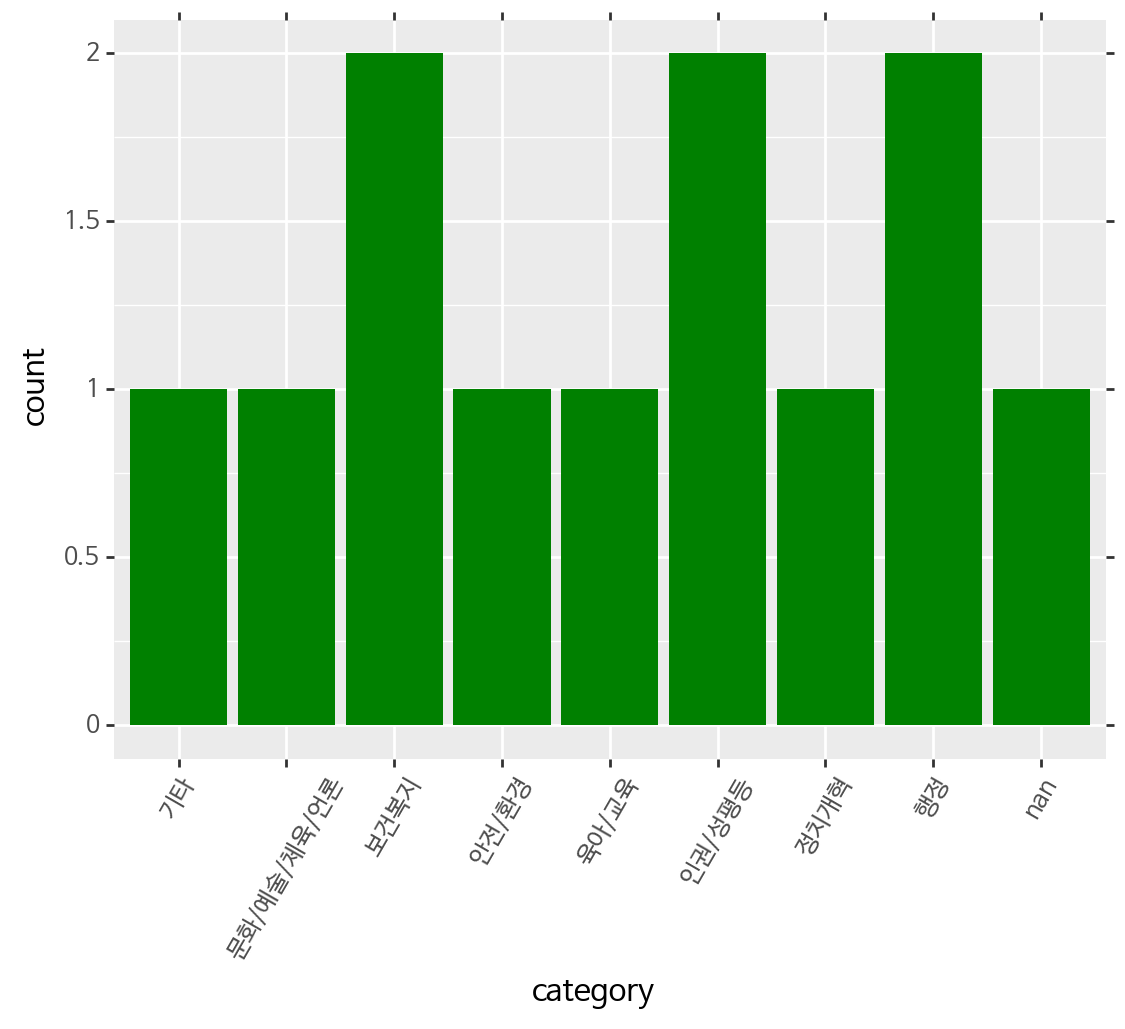

<ggplot: (8765151749057)>

In [ ]:
# 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

### 카테고리별 투표수

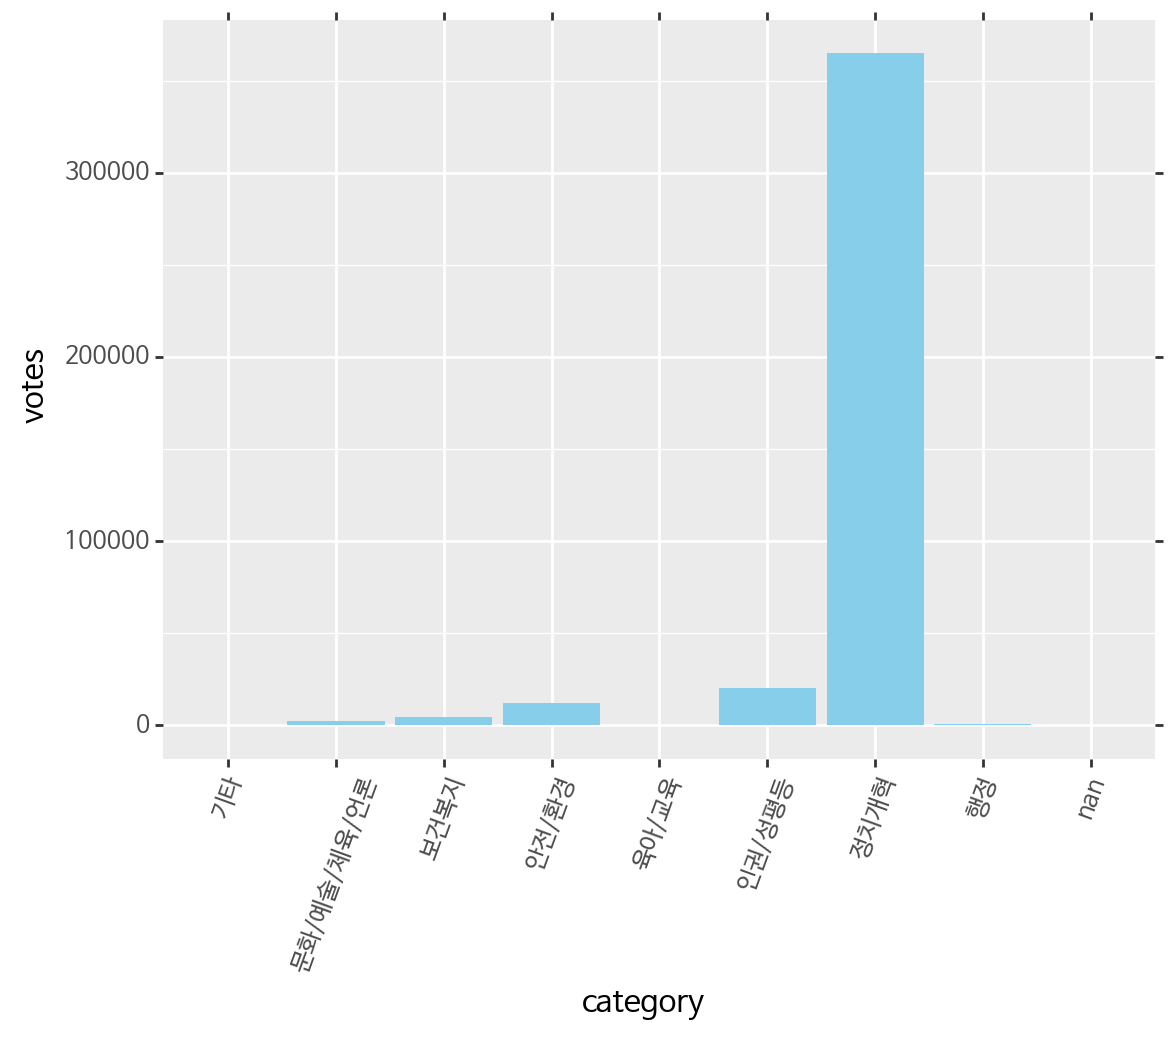

<ggplot: (8765151734389)>

In [ ]:
# 다음으로 투표를 많이 받은 카테고리를 알아본다.
# 정치/개혁에 관련된 청원의 숫자가 가장 많았지만 투표를 가장 많이 받은 청원은 인권/성평등이다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

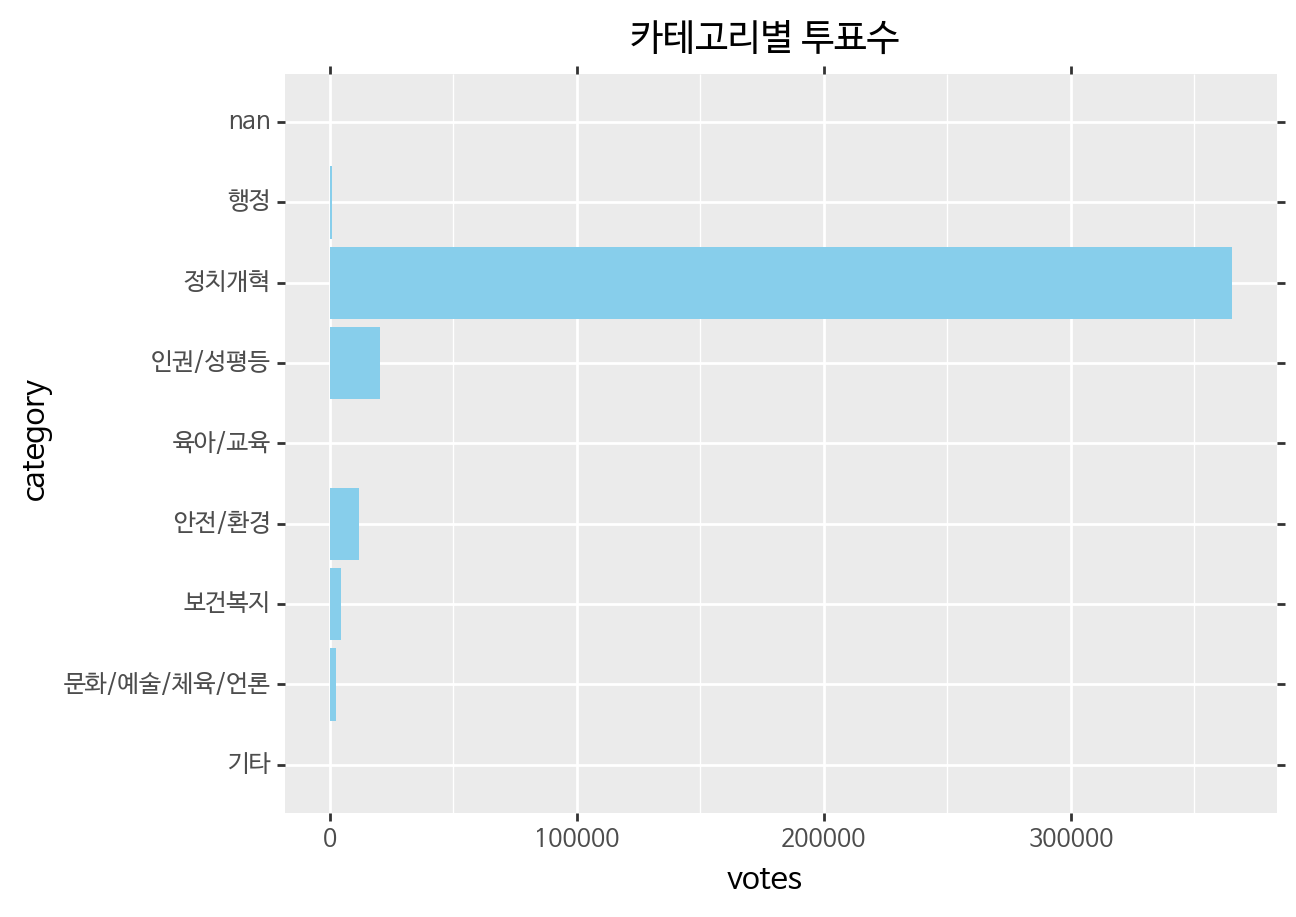

<ggplot: (8765151746357)>

In [ ]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

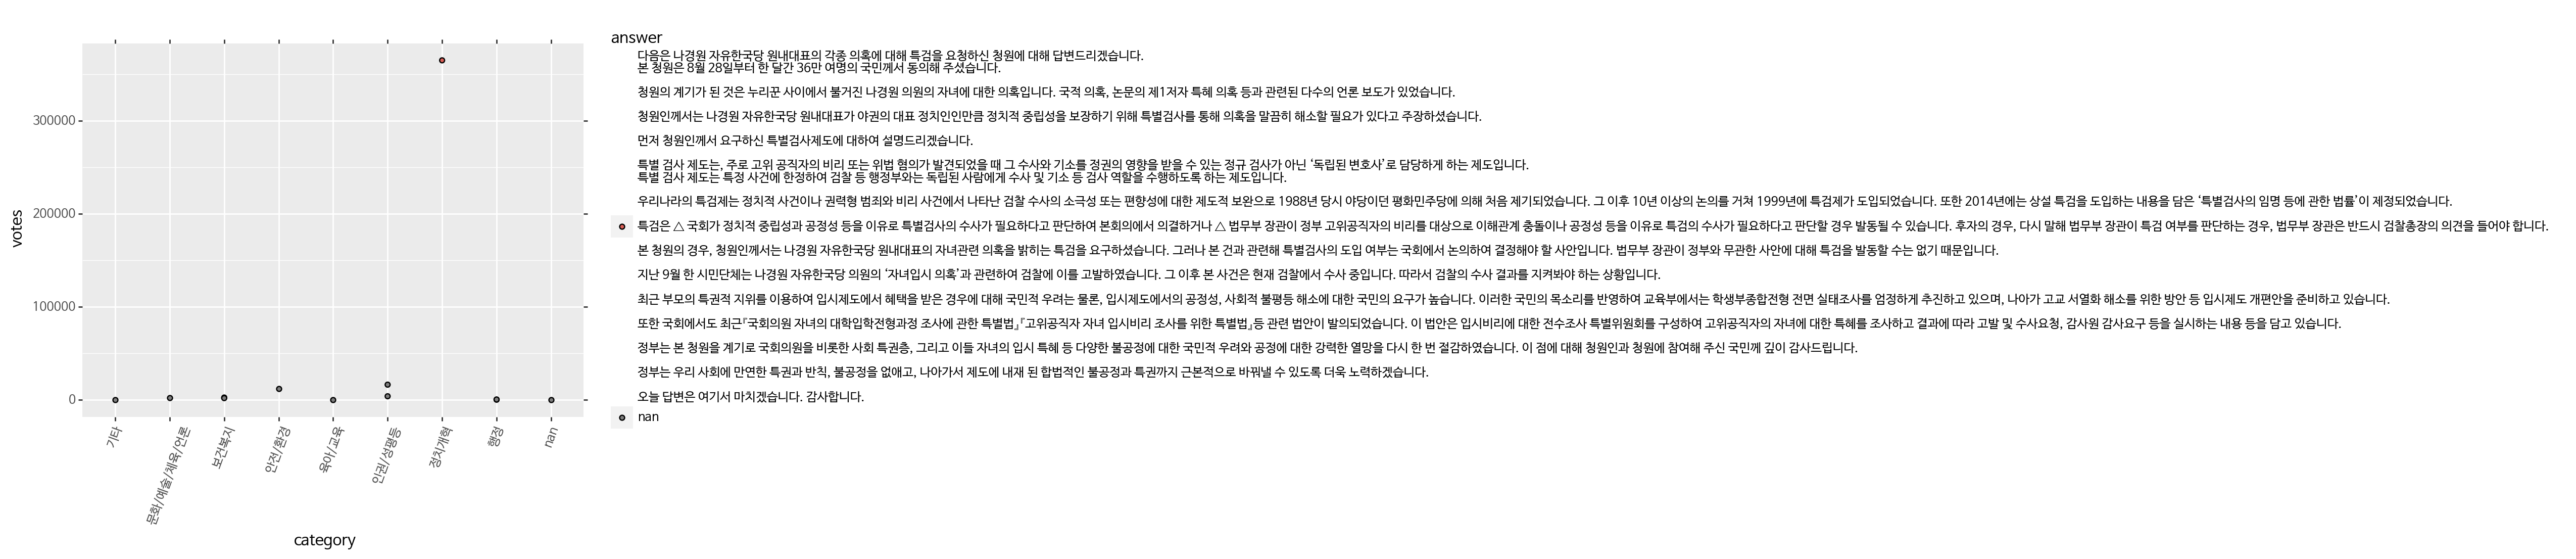

<ggplot: (8765150114181)>

In [ ]:
(ggplot(petitions) 
 + aes(x='category', y='votes', fill='answer')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

In [ ]:
(ggplot(petitions) 
 + aes(x='category', y='votes', fill='answer')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

TypeError: ignored

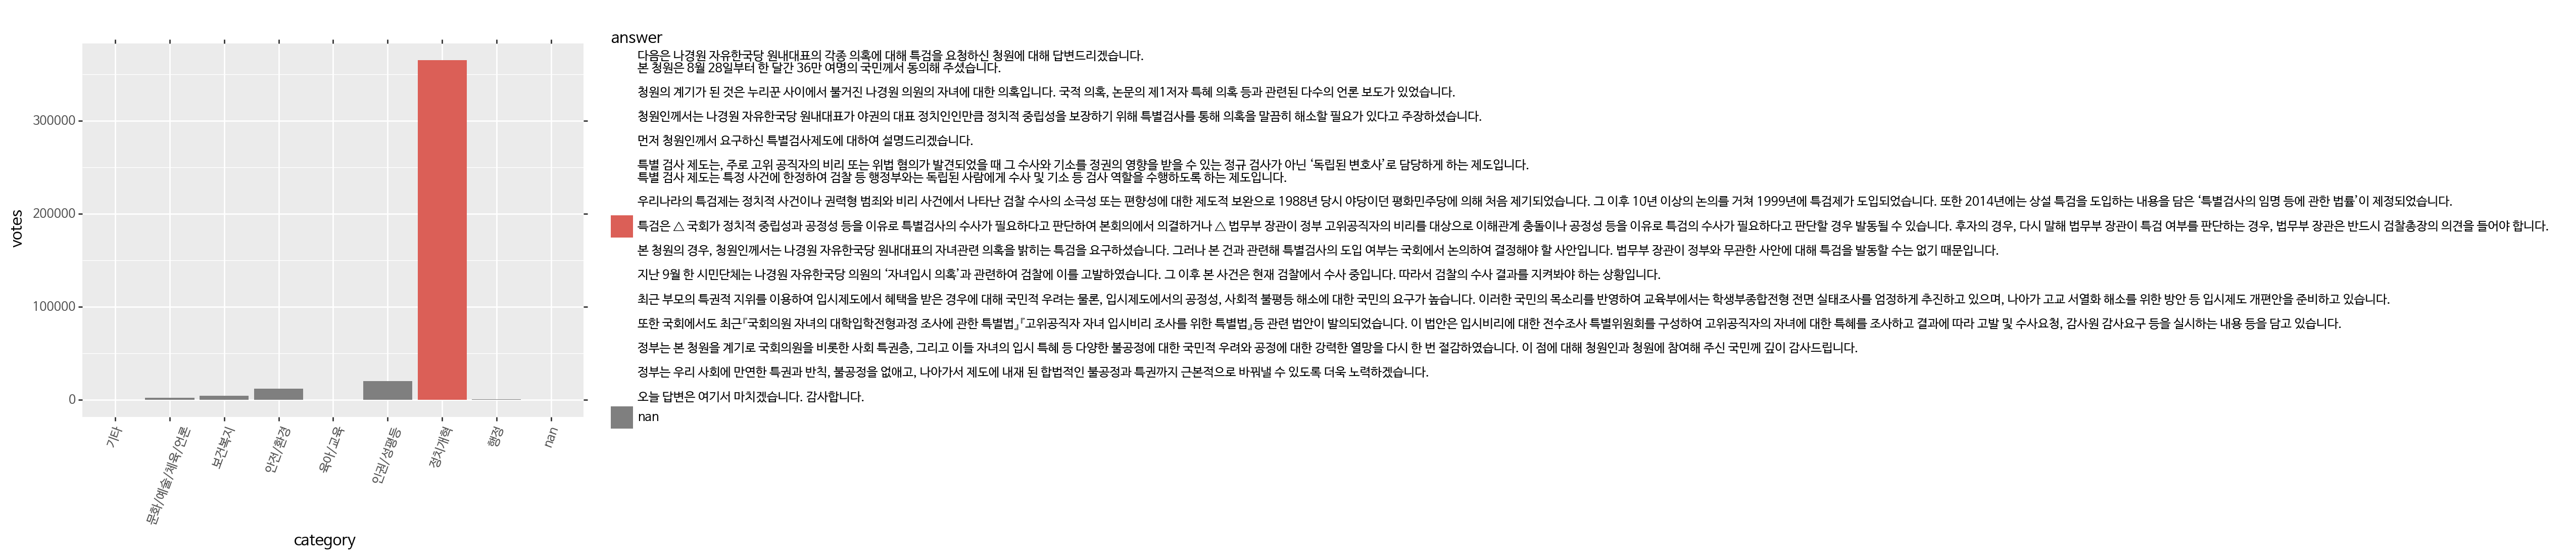

<ggplot: (8765149875841)>

In [ ]:
(ggplot(petitions, aes(x='category', y='votes', fill='answer'))
 + geom_col()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

In [ ]:
# 투표를 가장 많이 받은 카테고리인 인권/성평등에서 투표수가 많은 순으로 상위 10개만 본다.
edu = petitions.loc[(petitions['category']=='인권/성평등')]
edu.sort_values('votes', ascending=False)[:10]

progress   ...    duration
article_id            ...            
602923        청원진행중   ...     30 days
602919        청원진행중   ...     30 days

[2 rows x 11 columns]

## 시계열 데이터 보기

In [ ]:
petitions['start_month'] = petitions['start'].dt.month
petitions['start_day'] = petitions['start'].dt.day
petitions['start_hour'] = petitions['start'].dt.hour
petitions.shape

(12, 14)

In [ ]:
petitions['start_month'].value_counts()

12.0    10
8.0      1
Name: start_month, dtype: int64

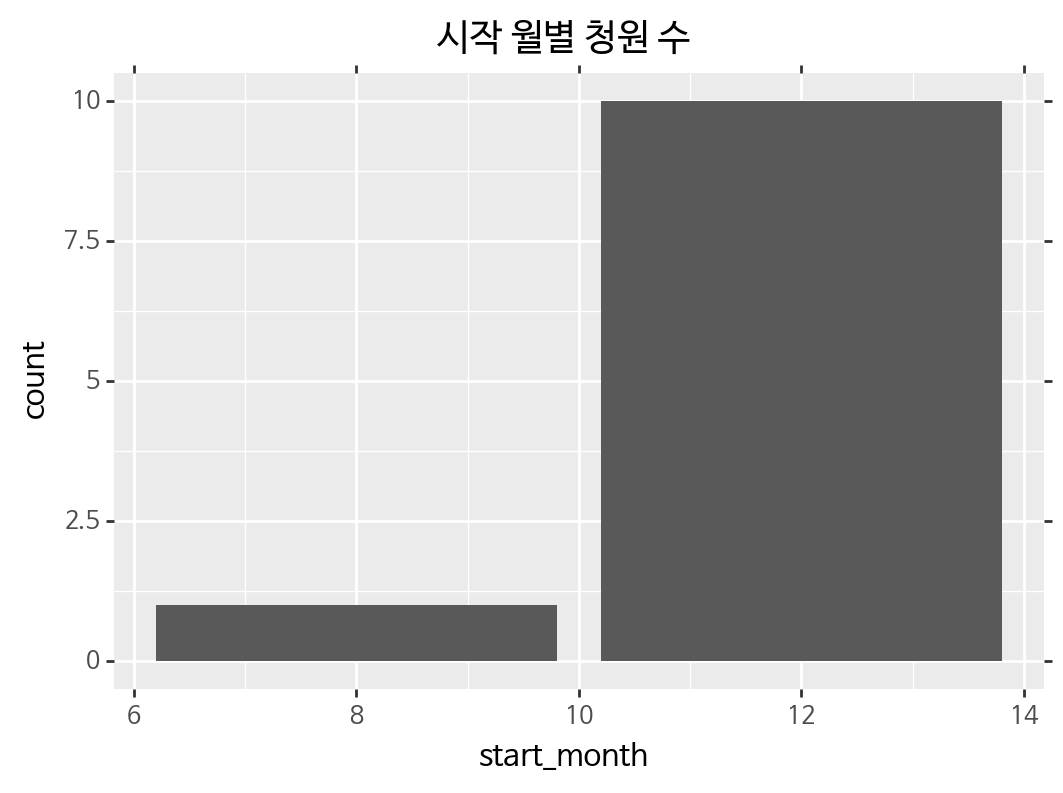

<ggplot: (8765149852121)>

In [ ]:
(ggplot(petitions)
 + aes('start_month')
 + geom_bar()
 + ggtitle('시작 월별 청원 수')
 + theme(text=element_text(family='NanumBarunGothic'),  figure_size=(6, 4))
)

In [ ]:
start_day = petitions['start_day'].value_counts().reset_index()
start_day.columns = ['start', 'counts']
start_day = start_day.sort_values('start', ascending=True)
start_day[:3]

start  counts
0   10.0      10
1   28.0       1

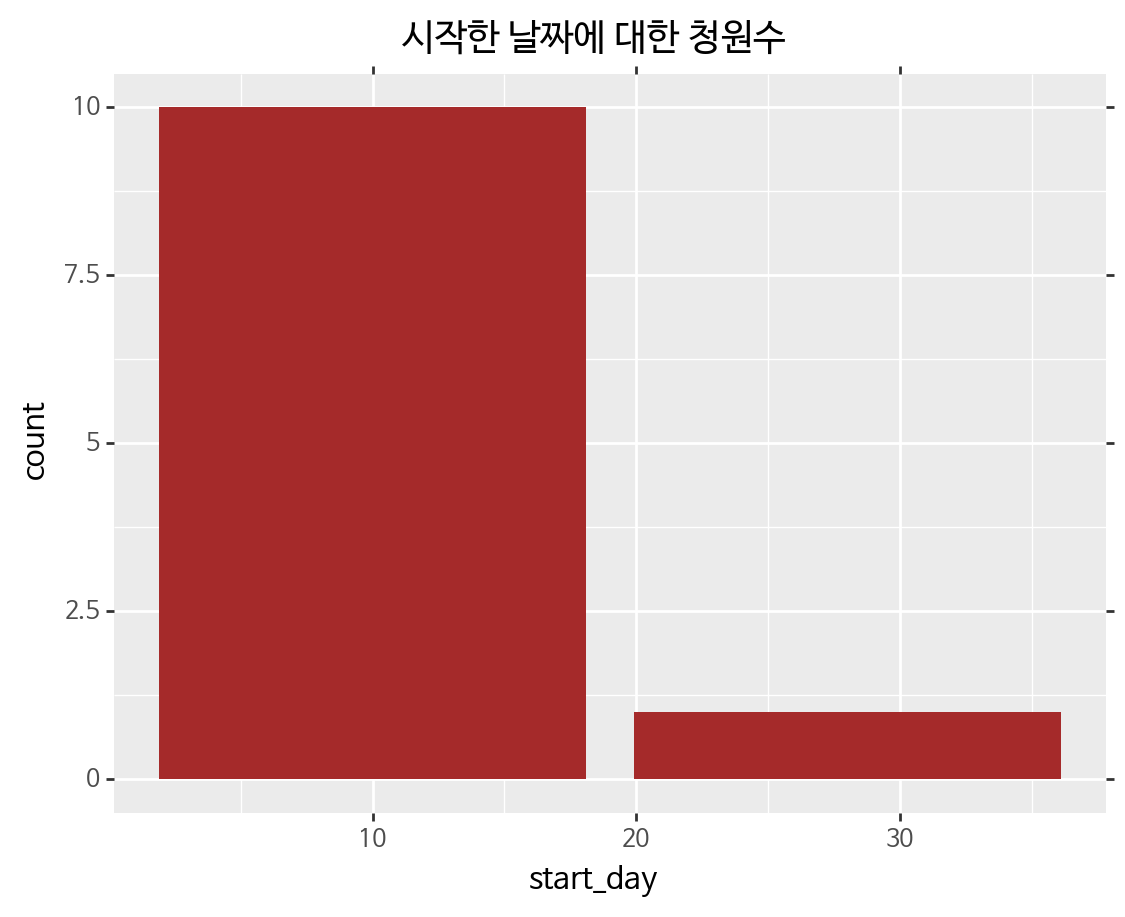

<ggplot: (8765149806977)>

In [ ]:
# 5일과 11일에 청원이 많이 등록되었다.
# 데이터를 보면 5일과 11일에 청원이 많이 등록된다기 보다는 
# 특정 시기에 5일과 11일에 같은 내용의 청원이 많이 들어 온 날이 있다.
# 따라서 날짜에 따라 규칙성을 찾기는 어렵다.
(ggplot(petitions)
 + aes('start_day')
 + geom_bar(fill='brown')
 + ggtitle('시작한 날짜에 대한 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [ ]:
# 날짜 데이터에 시간이 없기 때문에 시간은 의미가 없다.
petitions['start_hour'].value_counts()

0.0    11
Name: start_hour, dtype: int64

In [ ]:
# 날짜별 청원 수를 구하고 날짜로 정렬한다.
petition_count = petitions['start'].value_counts().reset_index()
petition_count.columns = ['start', 'count']
petition_count = petition_count['start'].sort_values().reset_index()
petition_count.columns = ['count', 'start']
petition_count.head()

count      start
0      1 2019-08-28
1      0 2021-12-10

In [ ]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('start', ascending=True)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 2일


start  counts
1 2019-08-28       1
0 2021-12-10      10

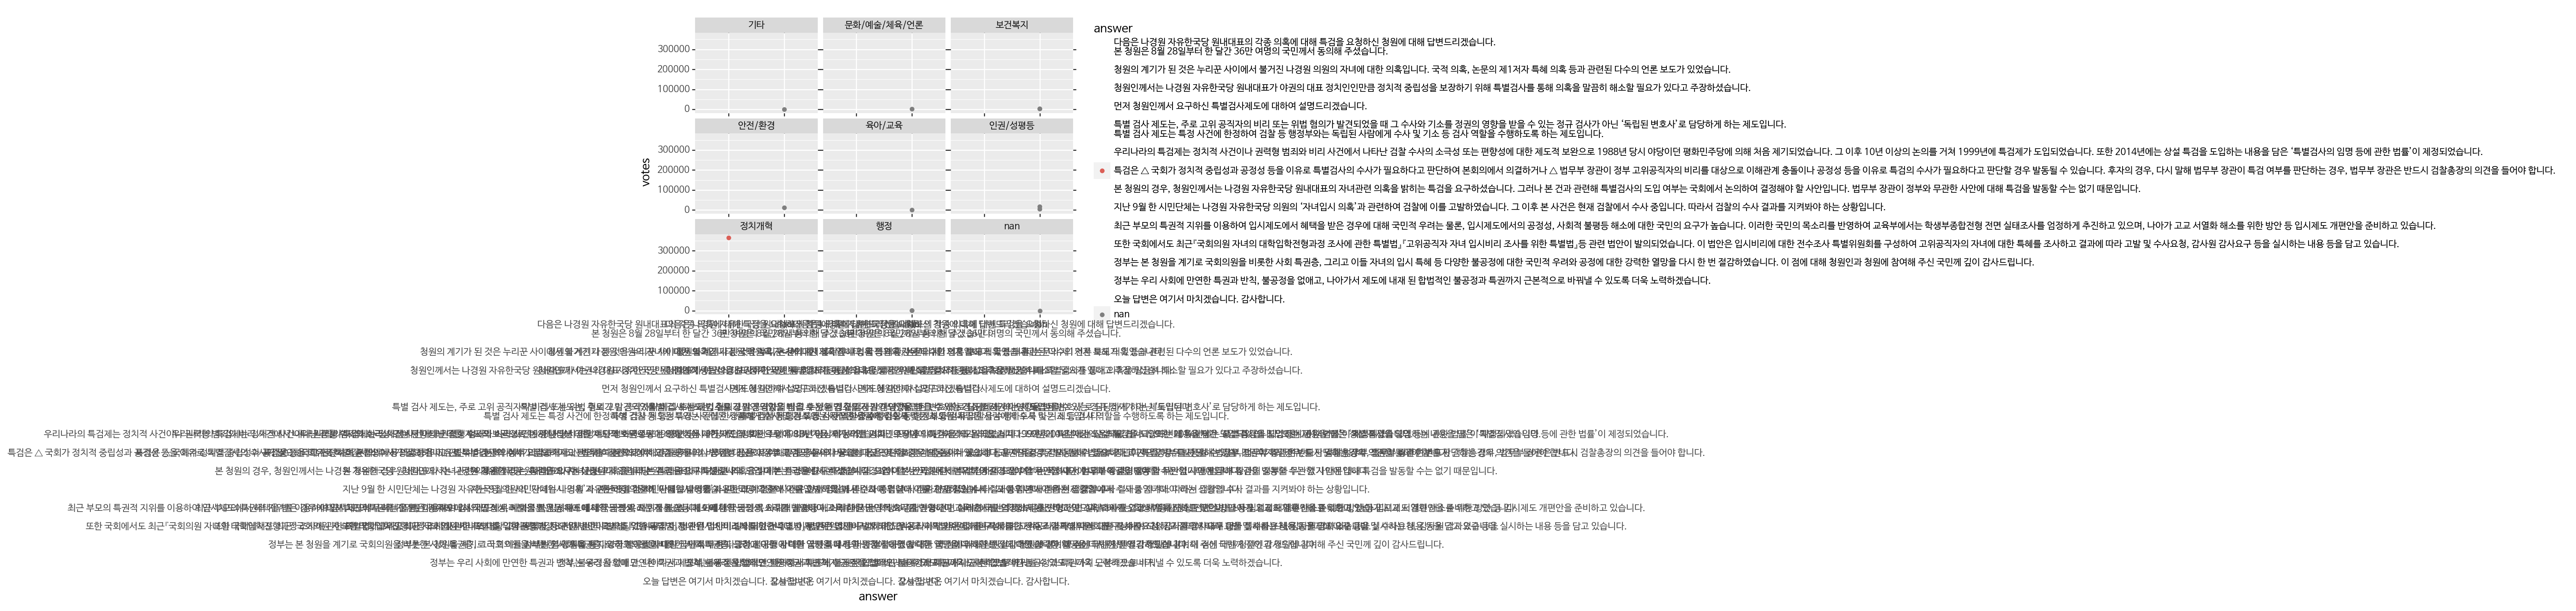

<ggplot: (8765149748245)>

In [ ]:
# 날짜별로 카테고리별 투표수를 본다.
# 20만건 이상 투표를 받아야지만 답변을 받을 수 있다는것을 그래프를 통해 짐작해볼 수 있다.
# 답변을 받지못한 카테고리도 있다.
(ggplot(petitions)
 + aes('answer', 'votes')
 + aes(color='answer')
 + geom_point()
 + facet_wrap('~category')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [ ]:
start_ordered_df = petitions['start'].value_counts().index.tolist()
petitions_start_df = CategoricalDtype(categories=start_ordered_df, ordered=True)
petitions_start_df

CategoricalDtype(categories=['2021-12-10', '2019-08-28'], ordered=True)

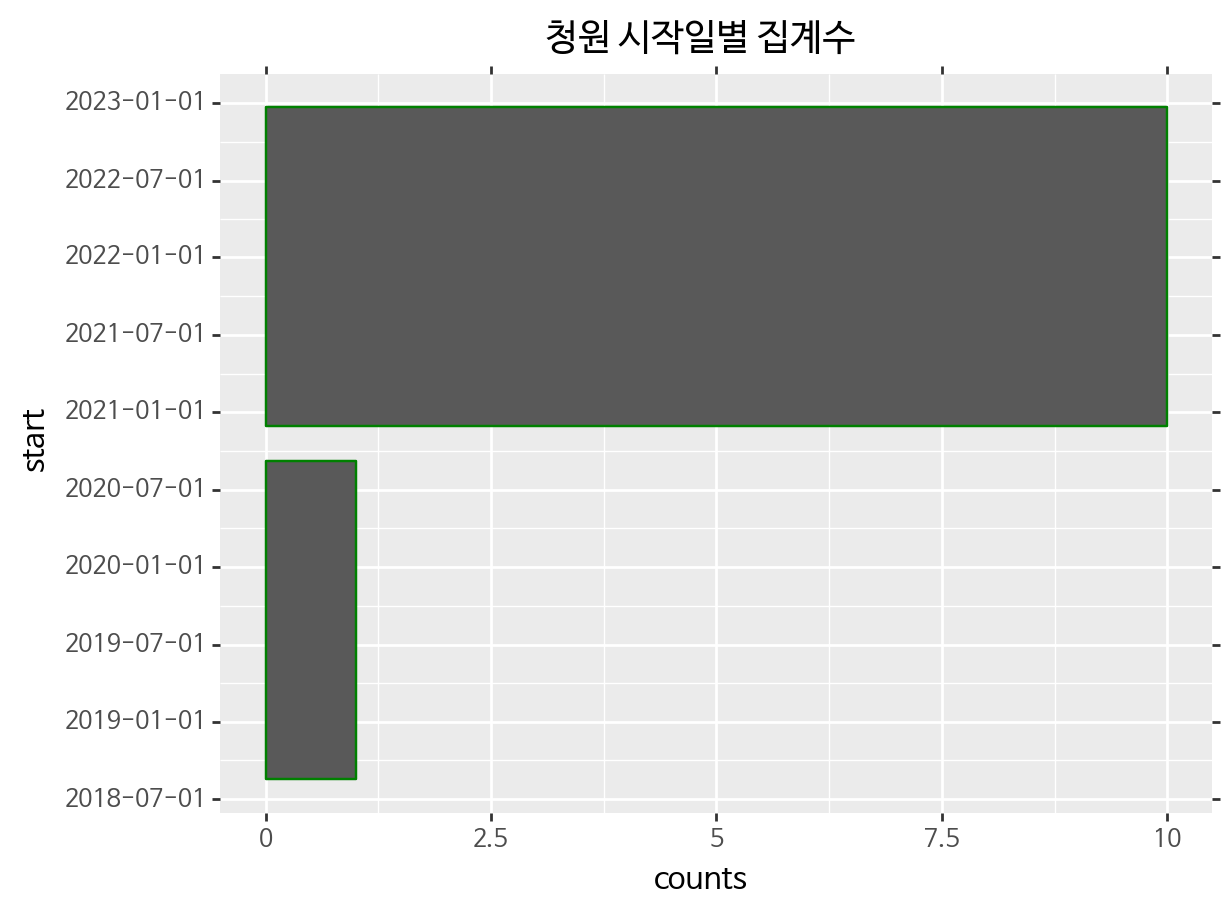

<ggplot: (8765149762345)>

In [ ]:
# 특히 청원이 많은 날이 있다. 그날 무슨 이슈가 있었는지 궁금하다.
(ggplot(start_df)
 + aes('start', 'counts')
 + geom_col(color='green')
 + ggtitle('청원 시작일별 집계수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

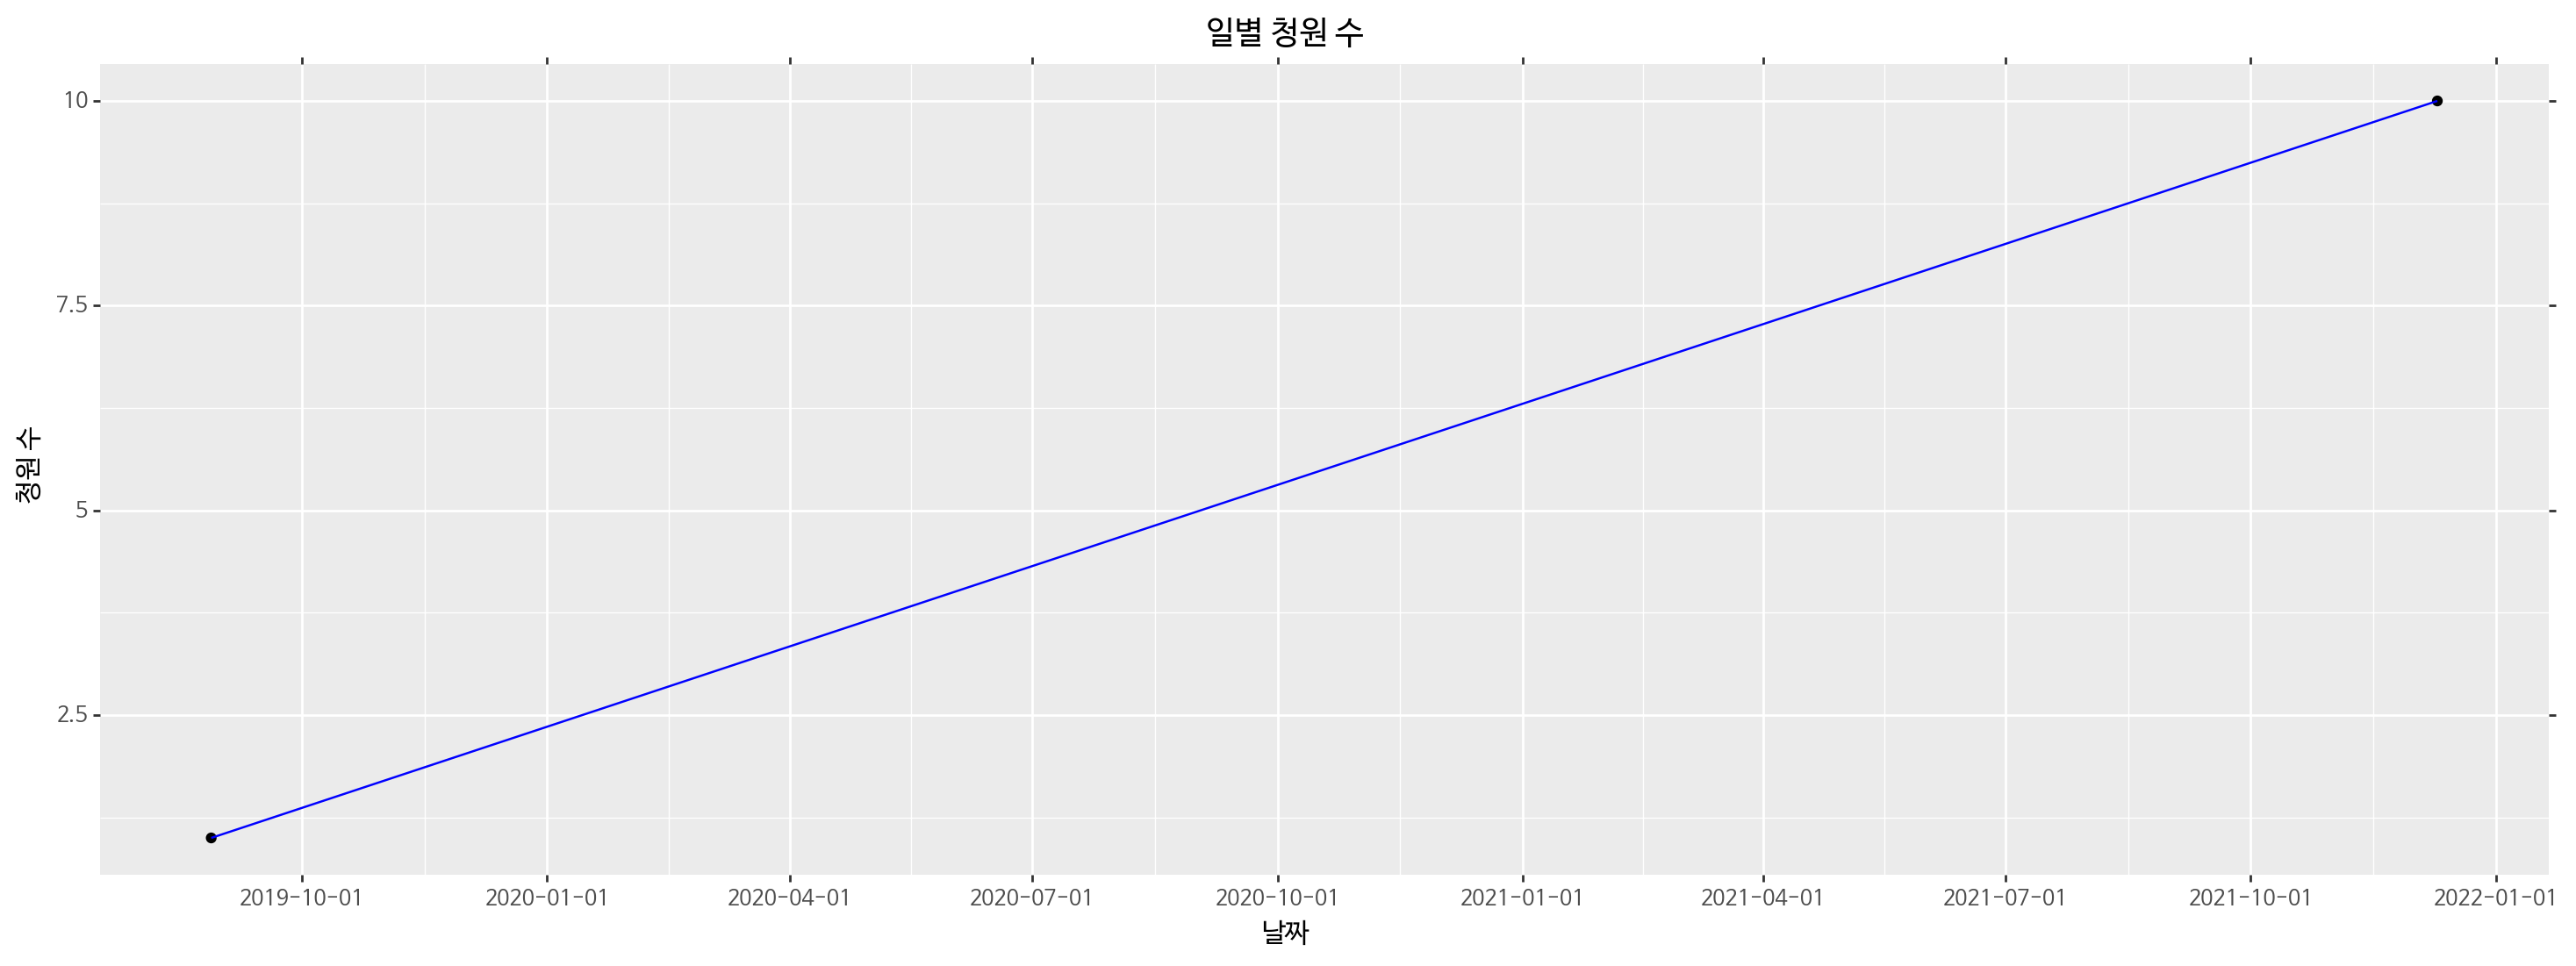

<ggplot: (8765149724909)>

In [ ]:
(ggplot(start_df)
 + aes(x='start', y='counts')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='청원 수', title='일별 청원 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(18,6))
)

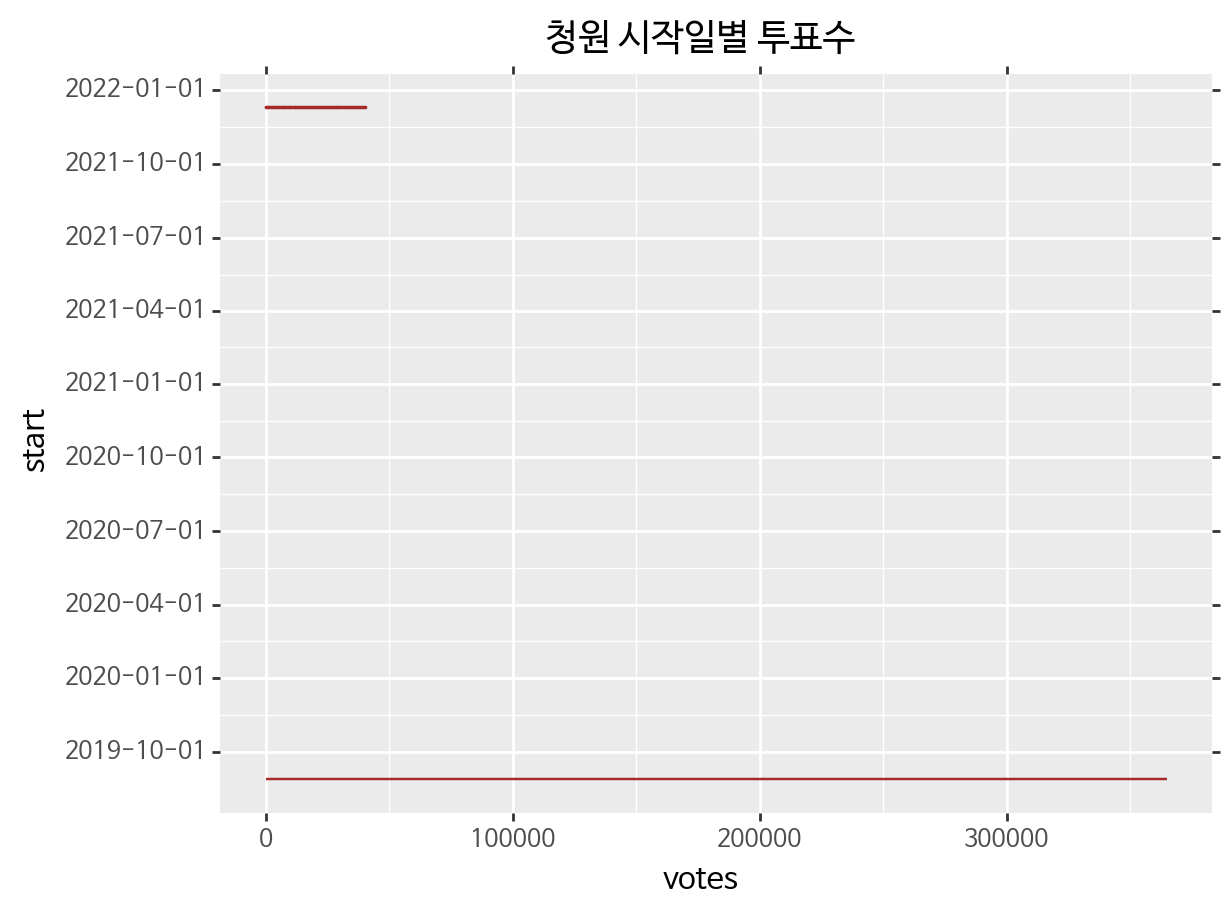

<ggplot: (8765149702197)>

In [ ]:
# 청원 시작 날짜별 투표수를 본다.
(ggplot(petitions)
 + aes('start', 'votes')
 + geom_col(color='brown')
 + ggtitle('청원 시작일별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

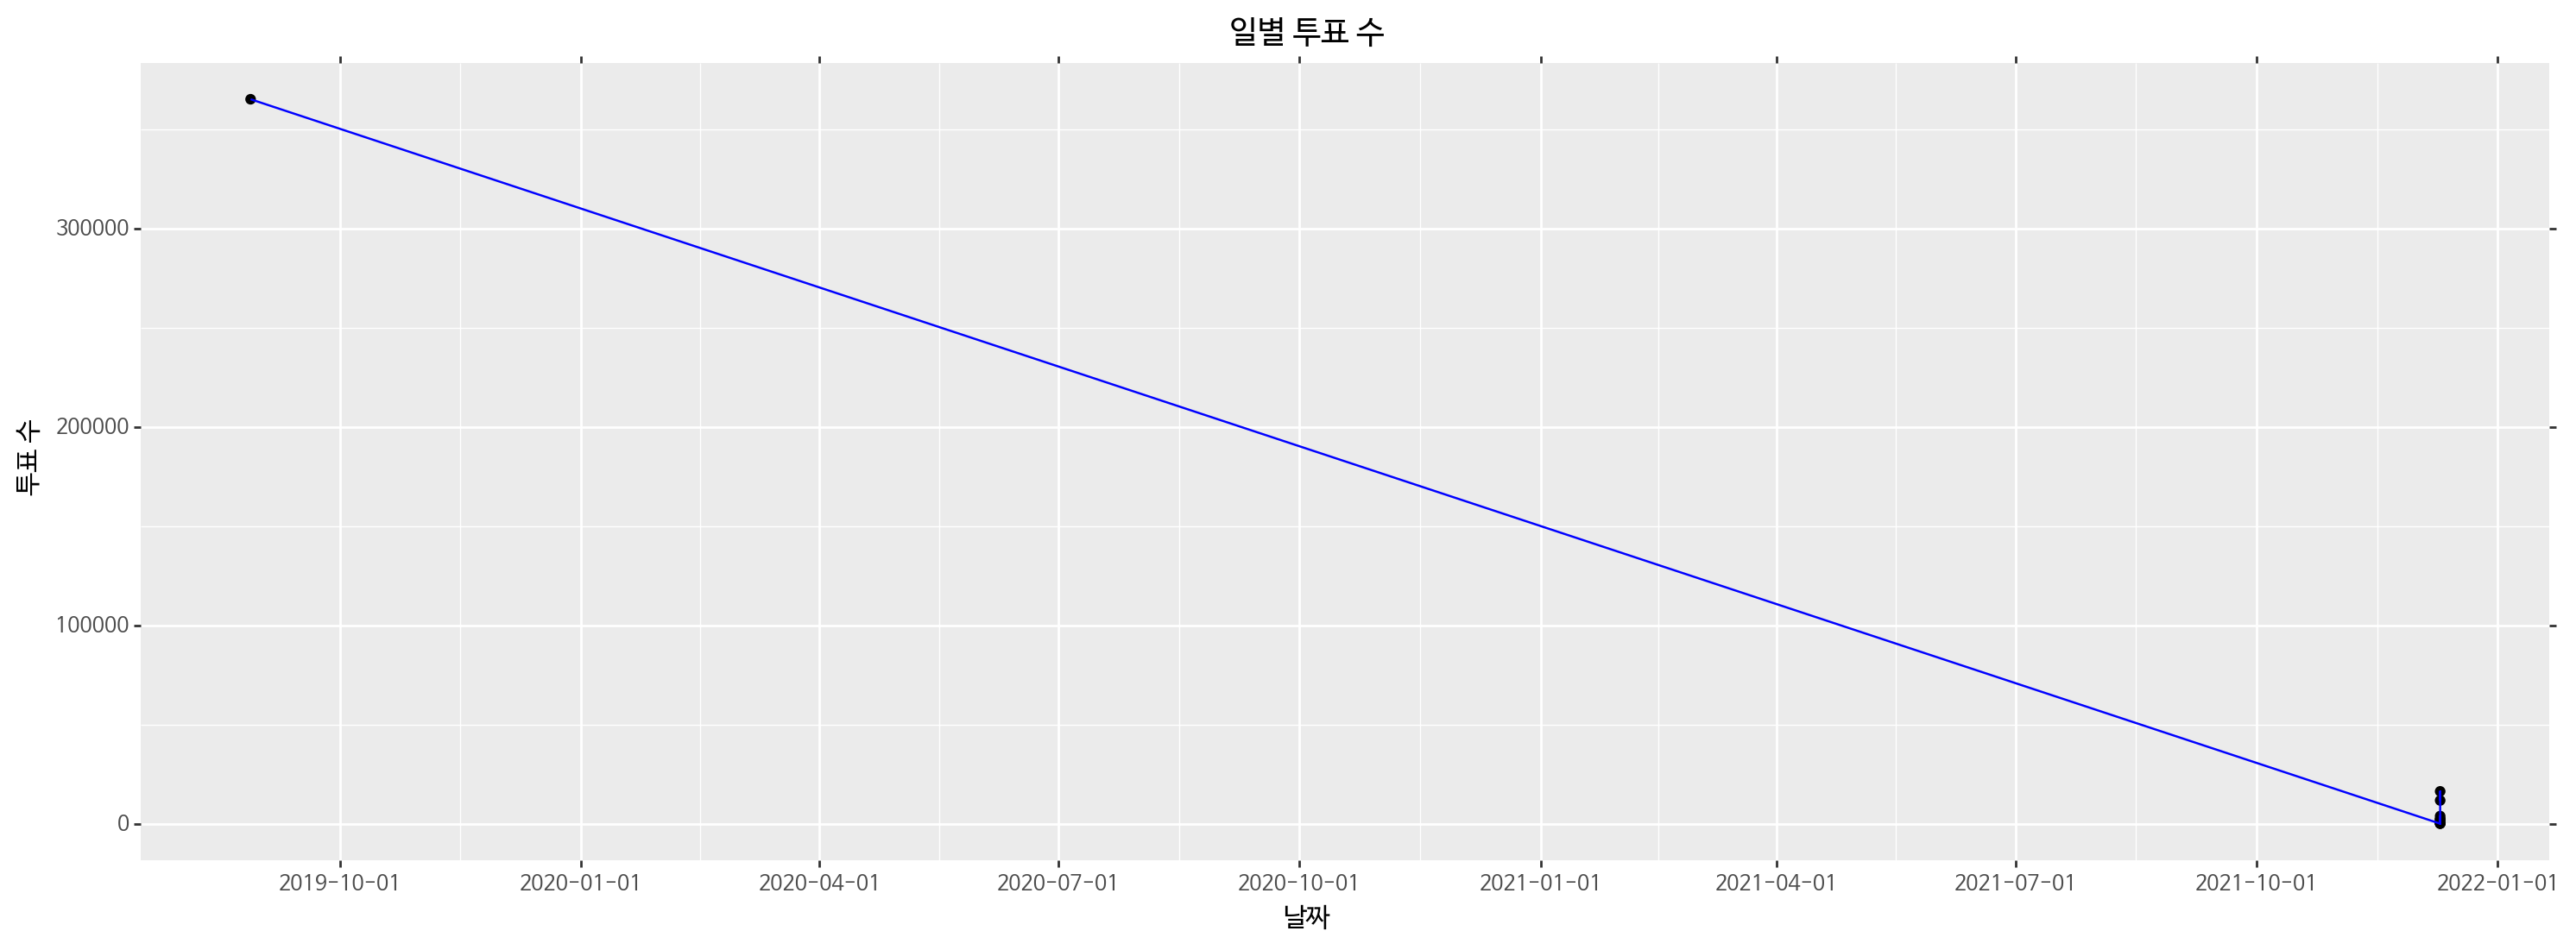

<ggplot: (8765149653045)>

In [ ]:
(ggplot(petitions)
 + aes(x='start', y='votes')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='투표 수', title='일별 투표 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(18,6))
)

In [ ]:
# 데이터에서 청원시작일 최근 30일인 데이터만 보기
petition_count[-30:]

count      start
0      1 2019-08-28
1      0 2021-12-10

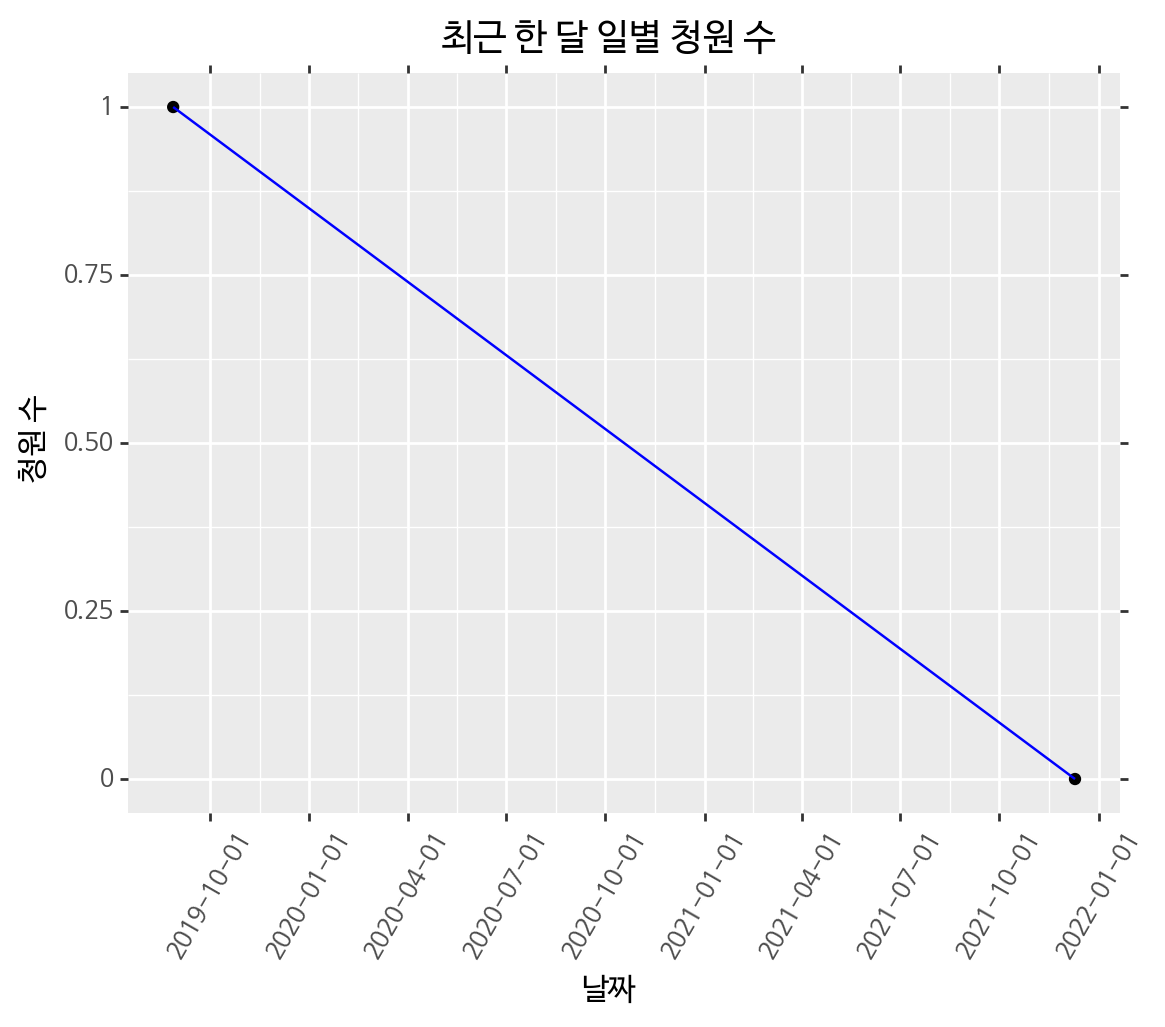

<ggplot: (8765149605961)>

In [ ]:
(ggplot(petition_count[-30:])
 + aes(x='start', y='count')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='청원 수', title='최근 한 달 일별 청원 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
# 일별 투표수
petition_votes = petitions.groupby(['start'])['votes'].sum().reset_index()
petition_votes.columns = ['start', 'votes']
petition_votes.head()

start   votes
0 2019-08-28  365040
1 2021-12-10   40678

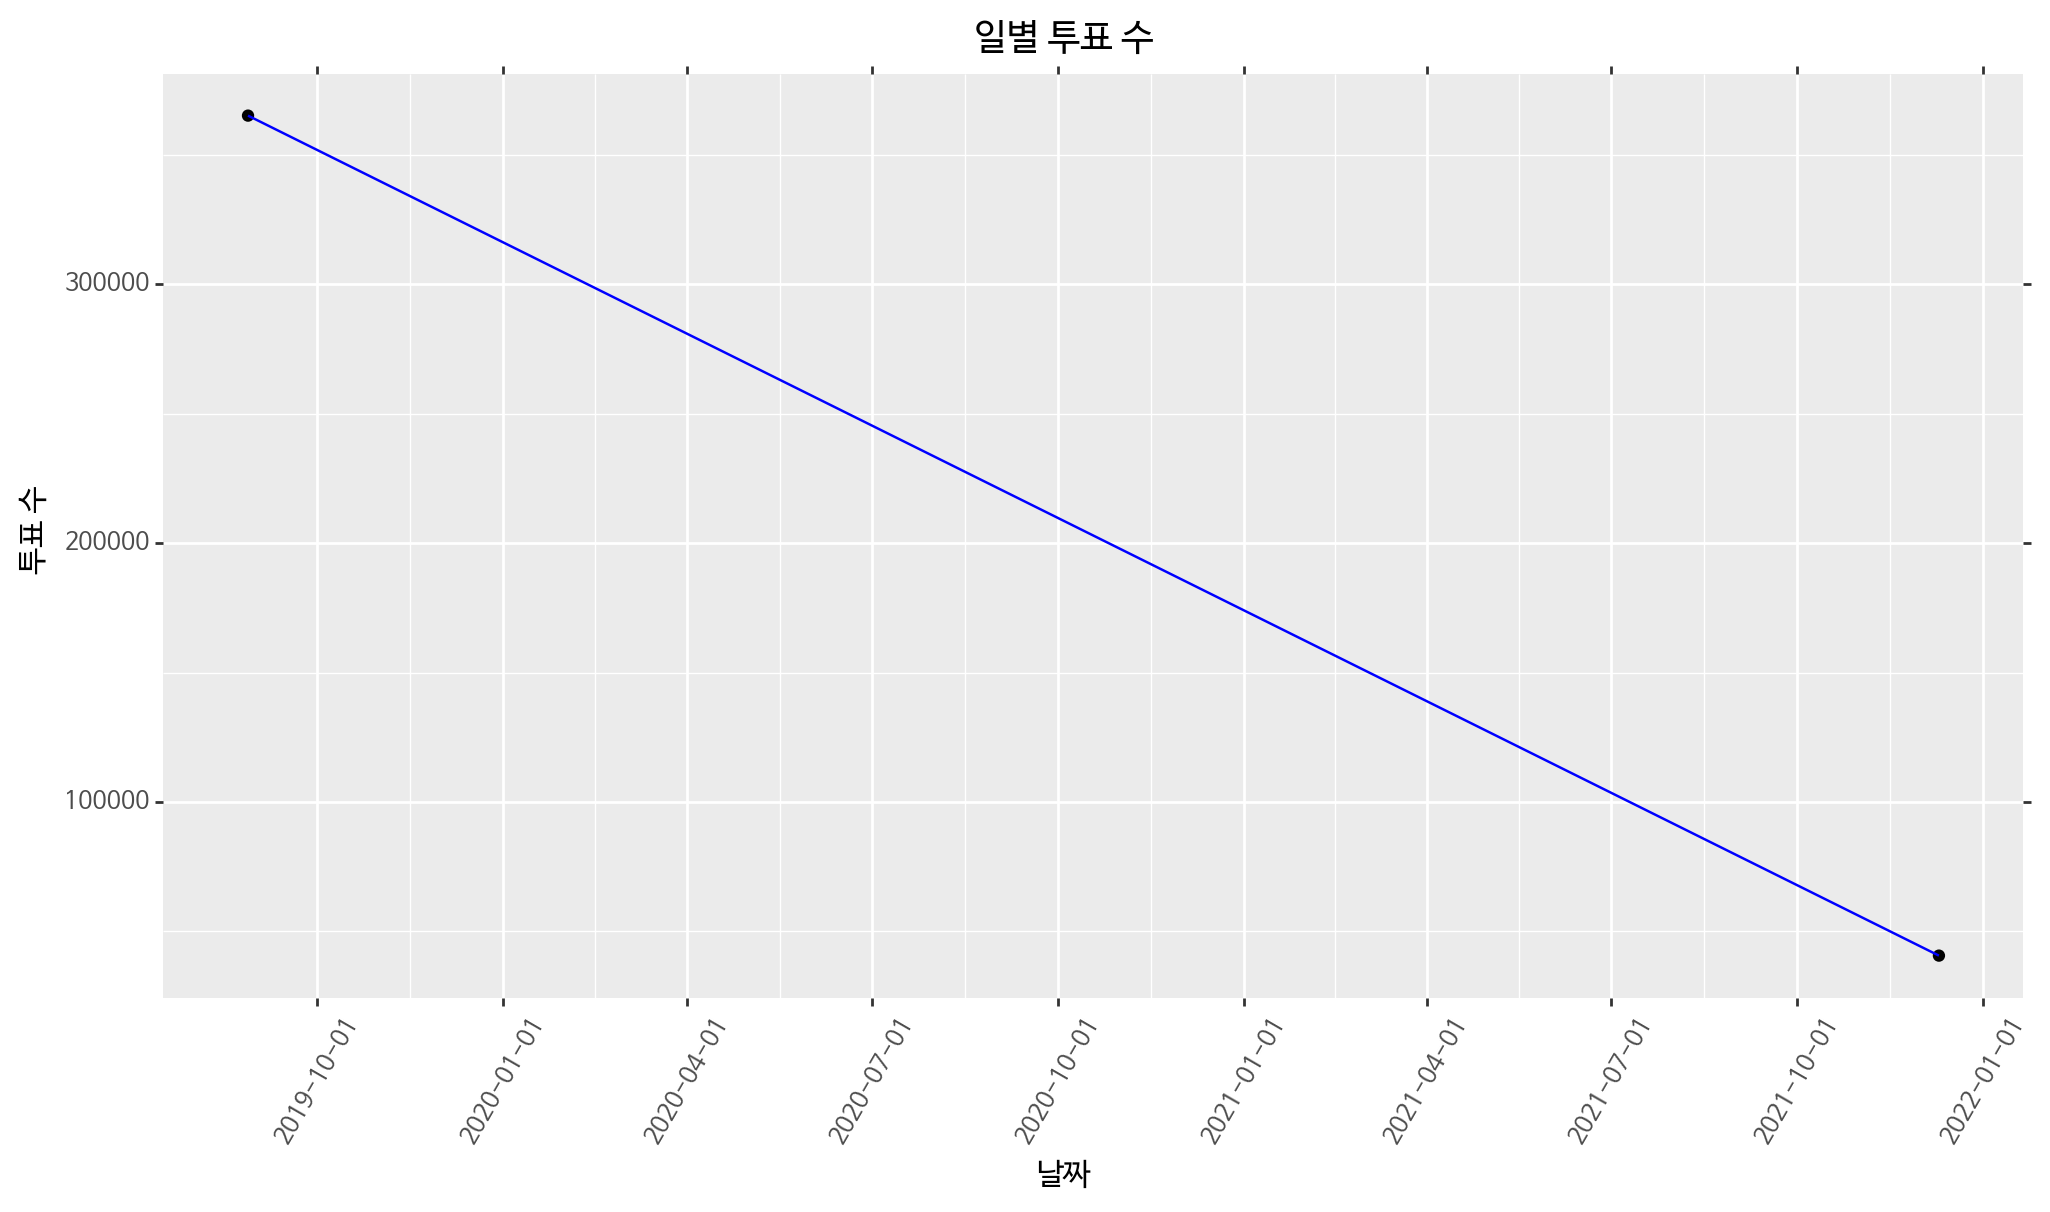

<ggplot: (8765149583333)>

In [ ]:
(ggplot(petition_votes)
 + aes(x='start', y='votes')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='투표 수', title='일별 투표 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6),
        axis_text_x=element_text(rotation=60))
)

In [ ]:
petition_votes[petition_votes['votes'] > 1000000]

Empty DataFrame
Columns: [start, votes]
Index: []

In [ ]:
petitions[(petitions['start'] == '2018-10-17') &
          (petitions['votes'] > 1000000)]

Empty DataFrame
Columns: [progress, title, votes, content, answer, category, start, end, proponent, answered, duration, start_month, start_day, start_hour]
Index: []

## 청원이 많이 등록된 날
- 3천건 이상 청원이 등록된 날 어떤 청원이 있는지 본다.

In [ ]:
# 청원이 3000 건이 넘는 날이 있다.
start_df.loc[start_df['counts'] > 3000]

Empty DataFrame
Columns: [start, counts]
Index: []

In [ ]:
petitions_20170905 = petitions.loc[petitions['start'] == '2017-09-05']
petitions_20170905.head()

Empty DataFrame
Columns: [progress, title, votes, content, answer, category, start, end, proponent, answered, duration, start_month, start_day, start_hour]
Index: []

In [ ]:
petitions_20170905['category'].value_counts()

Series([], Name: category, dtype: int64)

In [ ]:
(ggplot(petitions_20170905)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

ValueError: ignored

## 정치개혁 분야의 청원이 많이 들어 온 날의 청원 내용보기
- 하지만 투표를 가장 많이 받은 청원은 보건/복지 분야의 청원이다.

In [ ]:
petitions_20171111 = petitions.loc[petitions['start'] == '2017-11-11']
petitions_20171111.head()

Empty DataFrame
Columns: [progress, title, votes, content, answer, category, start, end, proponent, answered, duration, start_month, start_day, start_hour]
Index: []

In [ ]:
petitions_20171111['category'].value_counts()

Series([], Name: category, dtype: int64)

## Groupby 메서드 사용하기

https://pandas.pydata.org/pandas-docs/stable/api.html#groupby

In [ ]:
petitions_20171111.groupby(['category'])['votes'].sum()

Series([], Name: votes, dtype: int64)

## pivot_table 사용하기

In [ ]:
# 각 데이터의 수를 집계했다. 2017년 11월 11일에 가장 많은 청원이 들어 온 것은 정치개혁이다.
# values에 지정해 준 start_month는 데이터의 갯수를 세는 목적으로 사용했다.
petitions_unique = pd.pivot_table(petitions_20171111, 
                                  index=['category'], 
                                  values=['start_month', 'votes'], 
                                  aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False)
petitions_best

KeyError: ignored

## 제목과 내용의 길이
### 제목과 내용에 들어가는 단어수

In [ ]:
# 단어 수
%time petitions['title_num_words'] = petitions['title'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
%time petitions['title_num_uniq_words'] = petitions['title'].apply(lambda x: len(set(str(x).split())))

In [ ]:
# 단어 수
%time petitions['content_num_words'] = petitions['content'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
%time petitions['content_num_uniq_words'] = petitions['content'].apply(lambda x: len(set(str(x).split())))

In [ ]:
petitions.head()

In [ ]:
(ggplot(petitions)
 + aes('title_num_words', 'content_num_words')
 + geom_point(fill='red', color='lightgray', alpha=0.25)
 + ggtitle('제목, 내용 단어 수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [ ]:
(ggplot(petitions)
 + aes('votes', 'content_num_words')
 + geom_jitter(fill='red', color='lightgray', alpha=0.25)
 + ggtitle('투표수와 내용 단어 수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'red', high = 'yellow') 
)

## 특정 단어가 들어가는 청원보기

In [ ]:
crypto = petitions[( petitions.title.str.find('가상화폐') != -1 ) | ( petitions.content.str.find('가상화폐') != -1  )]
crypto.shape

In [ ]:
import re
p = r'.*(돌봄|아이|초등|보육).*'
care = petitions[petitions['title'].str.match(p) |
           petitions['content'].str.match(p, flags=re.MULTILINE)]
care.shape